# Data Mining: Used Cars on Craigslist

In [1]:
%matplotlib inline
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import CleaningCars as cc

## Load Data

In [94]:
cars = pd.read_csv('data/vehicles.csv')

## Data Inspection

In [3]:
cars.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
cars.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
cars.shape

(458213, 26)

In [7]:
cars.describe()

,id,price,year,odometer,lat,long
count,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [4]:
#Total number of null values in each column
cars.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [5]:
print("PERCENTAGE OF ROWS WITH NAN:")
print(cars.isnull().sum() / cars.shape[0] * 100)

PERCENTAGE OF ROWS WITH NAN:
Unnamed: 0       0.000000
id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.229151
manufacturer     3.976317
model            1.057587
condition       42.107055
cylinders       37.349442
fuel             0.706440
odometer        12.069278
title_status     0.562402
transmission     0.532940
VIN             40.930528
drive           29.285070
size            70.130703
type            24.603841
paint_color     30.737452
image_url        0.006111
description      0.015277
state            0.000000
lat              1.625445
long             1.625445
posting_date     0.006111
dtype: float64


In [10]:
#Every row is a unique car
len(np.unique(cars.id))

458213

In [11]:
#print(np.unique(cars.region))
print("Number of unique regions:", len(np.unique(cars.region)))

Number of unique regions: 405


In [12]:
print("Number of unique region urls:", len(np.unique(cars.region_url)))

Number of unique region urls: 413


In [16]:
print(np.max(cars.year))
print(np.min(cars.year))
print(np.mean(cars.year))
##Perhaps experiment with binning years into categorical variables (very old, old, new, very new etc.)
years = cars.year.value_counts()
years.tail(30)

2021.0
1900.0
2010.7460665014448


1946.0    49
1932.0    48
1934.0    39
1928.0    37
1939.0    36
1937.0    32
1936.0    29
1938.0    27
1935.0    25
1927.0    23
1923.0    20
1900.0    19
1933.0    16
1926.0    13
1942.0    11
1924.0     8
1925.0     7
1912.0     5
1911.0     4
1914.0     2
1943.0     2
1945.0     2
1920.0     1
1918.0     1
1915.0     1
1921.0     1
1913.0     1
1922.0     1
1910.0     1
1919.0     1
Name: year, dtype: int64

In [23]:
#Price
#Clearly at least 1 huge outlier.
print(np.mean(cars.price))
print(np.max(cars.price))
print(np.min(cars.price))
#We clearly need to remove some of these but where do we set the threshold?
#Is the 'price' the listed price or the price that the cars were actually sold for? Probably the former.
print(cars[cars.price > 500000][['manufacturer','price','model']].head(30))

40420.93069598637
3615215112
0
         manufacturer       price                      model
1622        chevrolet  1234567890                        NaN
21955       chevrolet     1234567                        NaN
25413          nissan    11111111                 pathfinder
38375             gmc  2808348671                        NaN
39335          toyota      599000                        NaN
55387          toyota      888777               land cruiser
91692   mercedes-benz      999000                   amg g 63
107009  mercedes-benz     9999999                  benz e350
109428           jeep     3429900         wrangler unlimited
109654            NaN    11111111                      Mopar
117008      chevrolet     1234567                       nova
145053           jeep    12345679                   wrangler
151283           jeep     1234567                   wrangler
151323           jeep     1234567                   wrangler
167398      chevrolet     1234567                  sil

In [7]:
def uniqueAndCounts(col):
    print(np.unique(cars[col].astype(str)))
    print(cars[col].astype(str).value_counts())

In [6]:
def priceBar(feature):
    bar = cars[['price',feature]].groupby([feature])['price'].median()
    plt.bar(bar.index, bar)
    plt.xticks(rotation=90)
    plt.ylabel('Median Car Price')
    plt.show()

In [61]:
#Manufacturer
#Doesnt appear to be any spelling issues.
#Can we bin these somehow? Perhaps into American/asian/european cars to reduce the number of categories
#Can we infer some of the missing values by comparing the model with known examples? Otherwise remove NAs
uniqueAndCounts(col='manufacturer')

['acura' 'alfa-romeo' 'aston-martin' 'audi' 'bmw' 'buick' 'cadillac'
 'chevrolet' 'chrysler' 'datsun' 'dodge' 'ferrari' 'fiat' 'ford' 'gmc'
 'harley-davidson' 'hennessey' 'honda' 'hyundai' 'infiniti' 'jaguar'
 'jeep' 'kia' 'land rover' 'lexus' 'lincoln' 'mazda' 'mercedes-benz'
 'mercury' 'mini' 'mitsubishi' 'morgan' 'nan' 'nissan' 'pontiac' 'porsche'
 'ram' 'rover' 'saturn' 'subaru' 'tesla' 'toyota' 'volkswagen' 'volvo']
ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
nan                18220
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008


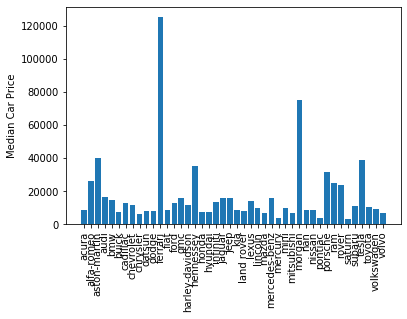

In [62]:
#ferrari, morgan, tesla, porsche stick out
priceBar(feature='manufacturer')

In [28]:
#I'm not sure if this column will ultimately be helpful
print("Number of unique car models:", len(np.unique(cars.model.astype(str))))
print(cars.model)

Number of unique car models: 31521
0         corvette grand sport
1                       sonata
2                      x3 3.0i
3                         c-10
4                  f350 lariat
                  ...         
458208                     srx
458209                  tucson
458210           cts coupe awd
458211          grand cherokee
458212      International 4300
Name: model, Length: 458213, dtype: object


In [29]:
#Condition
#One hot encode this
#Perhaps bin a couple of these if similar.
uniqueAndCounts(col='condition')

['excellent' 'fair' 'good' 'like new' 'nan' 'new' 'salvage']
nan          192940
good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64


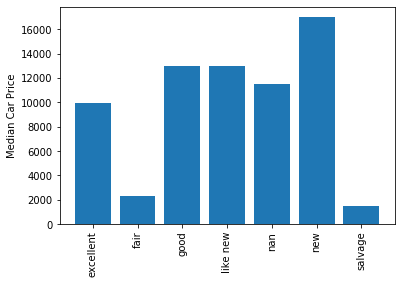

In [53]:
#Could group like new and good, and maybe excellent into one category
priceBar(feature='condition')

In [65]:
#Cylinders
#Categorical or numerical?
#Might need to be categorical so we dont need to remove all the NAs
uniqueAndCounts(col='cylinders')

['10 cylinders' '12 cylinders' '3 cylinders' '4 cylinders' '5 cylinders'
 '6 cylinders' '8 cylinders' 'nan' 'other']
nan             171140
6 cylinders     105677
4 cylinders      94767
8 cylinders      81179
5 cylinders       2058
10 cylinders      1543
other             1112
3 cylinders        550
12 cylinders       187
Name: cylinders, dtype: int64


In [30]:
#Fuel
#One hot encode this
#Can we infer some of the missing values by comparing the model/manufacturer with known examples? Otherwise remove NAs
uniqueAndCounts(col='fuel')

['diesel' 'electric' 'gas' 'hybrid' 'nan' 'other']
gas         399399
diesel       31077
other        16359
hybrid        5790
nan           3237
electric      2351
Name: fuel, dtype: int64


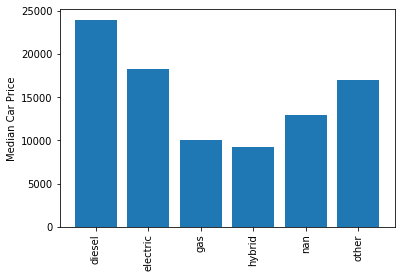

In [54]:
priceBar(feature='fuel')

In [67]:
#Title_status
#One hot encode
#What is lien? Perhaps bin depending on correlations between title_status and price
uniqueAndCounts(col='title_status')

['clean' 'lien' 'missing' 'nan' 'parts only' 'rebuilt' 'salvage']
clean         439626
rebuilt         8698
salvage         4233
nan             2577
lien            2091
missing          794
parts only       194
Name: title_status, dtype: int64


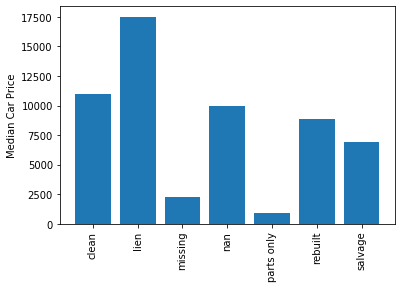

In [55]:
priceBar(feature='title_status')

In [68]:
#Transmission
#One hot encode
#What is 'other'?
#Can we infer some of the missing values by comparing the model/manufacturer with known examples? Otherwise remove NA
uniqueAndCounts(col='transmission')

['automatic' 'manual' 'nan' 'other']
automatic    396322
other         32186
manual        27263
nan            2442
Name: transmission, dtype: int64


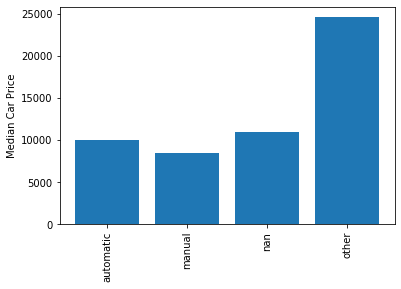

In [56]:
priceBar(feature='transmission')

In [69]:
#Drive
#One hot encode
#Can we infer some of the missing values by comparing the model/manufacturer with known examples?
uniqueAndCounts(col='drive')

['4wd' 'fwd' 'nan' 'rwd']
4wd    139693
nan    134188
fwd    122602
rwd     61730
Name: drive, dtype: int64


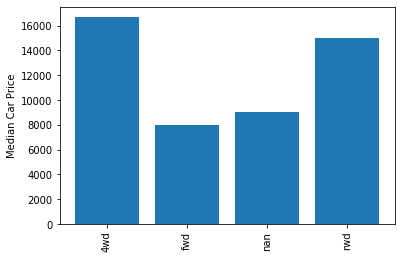

In [57]:
priceBar(feature='drive')

In [70]:
#Size
#One hot encode
#Can we infer some of the missing values by comparing the model/manufacturer with known examples?
uniqueAndCounts(col='size')

['compact' 'full-size' 'mid-size' 'nan' 'sub-compact']
nan            321348
full-size       69736
mid-size        41782
compact         21825
sub-compact      3522
Name: size, dtype: int64


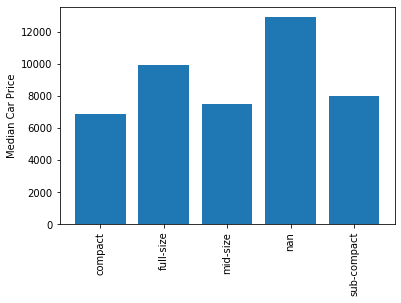

In [58]:
priceBar(feature='size')

In [71]:
#Type
#Bin these together depending on what we find from visualisations
#Can we infer some of the missing values by comparing the model/manufacturer with known examples?
uniqueAndCounts(col='type')

['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'nan' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']
nan            112738
sedan           92364
SUV             79882
pickup          43343
truck           35694
other           24160
coupe           19106
hatchback       16388
wagon           10473
van              9574
convertible      6864
mini-van         6263
bus               717
offroad           647
Name: type, dtype: int64


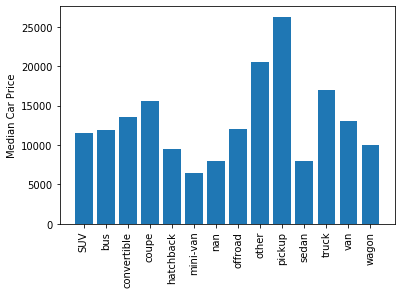

In [59]:
priceBar(feature='type')

In [72]:
#Colour
#What we do with this should be guided by viz. 
#If any colour seems predictive keep, otherwise remove
uniqueAndCounts(col='paint_color')

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'nan' 'orange' 'purple'
 'red' 'silver' 'white' 'yellow']
nan       140843
white      82786
black      64145
silver     46722
red        33274
blue       32746
grey       30455
custom      8843
green       7631
brown       6028
yellow      2002
orange      1970
purple       768
Name: paint_color, dtype: int64


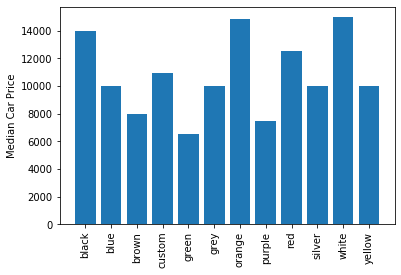

In [8]:
#Maybe black, white and orange are significant predictors?
priceBar(feature='paint_color')

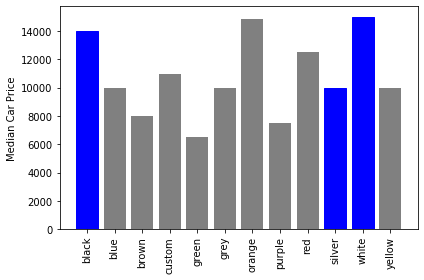

In [23]:
bar = cars[['price','paint_color']].groupby(['paint_color'])['price'].median()
barlist = plt.bar(bar.index, bar, color='grey')
barlist[0].set_color('blue')
barlist[-3].set_color('blue')
barlist[-2].set_color('blue')
plt.xticks(rotation=90)
plt.ylabel('Median Car Price')
plt.tight_layout()
plt.savefig('images/color.png', dpi=500)
plt.show()

In [73]:
cars.posting_date

0         2020-12-02T08:11:30-0600
1         2020-12-02T02:11:50-0600
2         2020-12-01T19:50:41-0600
3         2020-12-01T15:54:45-0600
4         2020-12-01T12:53:56-0600
                    ...           
458208    2020-12-03T08:56:29-0600
458209    2020-12-03T08:48:08-0600
458210    2020-12-02T14:09:45-0700
458211    2020-12-02T13:01:04-0700
458212    2020-12-02T12:03:45-0700
Name: posting_date, Length: 458213, dtype: object

In [63]:
#We could use a geocoder on lat and long to get further info about the location of sale (city or town)
#Check outliers, all coordinates should be within the USA
cars.lat

0         32.590000
1         32.547500
2         32.616807
3         32.861600
4         32.547500
            ...    
458208    44.408867
458209    44.408867
458210    44.784900
458211    44.773500
458212    42.117656
Name: lat, Length: 458213, dtype: float64

In [64]:
cars.long

0         -85.480000
1         -85.468200
2         -85.464149
3         -85.216100
4         -85.468200
             ...    
458208    -89.881210
458209    -89.882240
458210   -106.964800
458211   -106.939600
458212    -88.436954
Name: long, Length: 458213, dtype: float64

## Data Cleaning

In [49]:
#Remove VIN and image_url features
cc.remove_columns(cars)

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,2014.0,cadillac,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,wausau,17895,2018.0,hyundai,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,wyoming,17900,2014.0,cadillac,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,wyoming,1300,2008.0,jeep,good,8 cylinders,gas,164000.0,clean,automatic,4wd,SUV,white,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [4]:
#Convert posting_date to date type
cars['posting_date'] = cars['posting_date'].str[:10].astype('datetime64[ns]')

In [5]:
#Convert categorical features to string type
columns_to_str = ['region','manufacturer','condition','cylinders',
                 'fuel','title_status','transmission','drive','type','paint_color','description',
                 'state']

for col in columns_to_str:
    cars[col] = cars[col].astype(str)

In [6]:
cars.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


# Regional Analysis
region, state, lat, long

In [10]:
uniqueAndCounts('state')

['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']
ca    51856
fl    29952
tx    24856
ny    20332
mi    18905
oh    18367
or    17753
nc    16770
pa    13549
wi    13367
wa    13091
co    12015
tn    11744
va    11614
il    10556
nj    10087
ia     9688
id     9336
mn     8994
az     8886
ma     8672
mt     7801
sc     7559
ga     7212
in     7112
ok     6684
ks     6363
ct     6012
al     5715
mo     5617
ky     5035
ar     4789
md     4574
nm     4382
ak     3965
la     3641
nv     3137
hi     2964
nh     2958
dc     2954
vt     2951
me     2939
ri     2744
ne     2070
sd     2025
ms     1604
ut     1313
wy     1106
wv     1022
de     1011
nd      564
Name: state, dtype: int64


In [11]:
bar = cars[['price','state']].groupby(['state'])['price'].median()
bar.sort_values(ascending=False, inplace=True)
print(bar)

state
wy    18969.0
mt    17998.0
ak    17250.0
ut    16500.0
wv    15247.5
wa    14999.0
nd    14990.0
ne    14900.0
hi    14275.0
id    13888.0
tn    13599.5
al    13381.0
in    12999.0
tx    12995.0
nv    12995.0
nm    12950.0
az    12893.5
co    12800.0
ca    12500.0
ks    11990.0
md    11988.0
ky    11750.0
sd    11500.0
fl    10999.0
vt    10995.0
mo    10990.0
la    10950.0
mn    10500.0
nh    10500.0
ia    10000.0
wi    10000.0
ga    10000.0
ri     9995.0
nj     9995.0
dc     9990.0
sc     9980.0
ms     9900.0
ny     9900.0
ok     9800.0
pa     9395.0
de     9295.0
il     9295.0
oh     9285.0
mi     9000.0
or     8999.0
ma     8998.0
me     8995.0
ar     8995.0
ct     8000.0
nc     7999.0
va     6990.0
Name: price, dtype: float64


In [41]:
expensive_states = np.array(bar[bar >15000].index)
cars['state_expensive'] = cars.state.isin(expensive_states).astype(int)

In [42]:
mediumprice_state = np.array(bar[(bar > 10000) & (bar <= 15000)].index)
cars['state_medium'] = cars.state.isin(mediumprice_state).astype(int)

In [43]:
cheap_state = np.array(bar[bar <= 10000].index)
cars['state_cheap'] = cars.state.isin(cheap_state).astype(int)

In [47]:
def groupStateByPrice(df, lower=10000, higher=15000):
    cars = df.copy()
    #Find median price by state
    bar = cars[['price','state']].groupby(['state'])['price'].median()
    bar.sort_values(ascending=False, inplace=True)
    
    #Find expensive, mid price and cheap states according to thresholds
    expensive_states = np.array(bar[bar >higher].index)
    mediumprice_state = np.array(bar[(bar > lower) & (bar <= higher)].index)
    cheap_state = np.array(bar[bar <= lower].index)
    
    #Add on hot encoded features to dataset
    cars['state_expensive'] = cars.state.isin(expensive_states).astype(int)
    cars['state_medium'] = cars.state.isin(mediumprice_state).astype(int)
    cars['state_cheap'] = cars.state.isin(cheap_state).astype(int)
    
    return cars

In [51]:
cars = groupStateByPrice(cars)

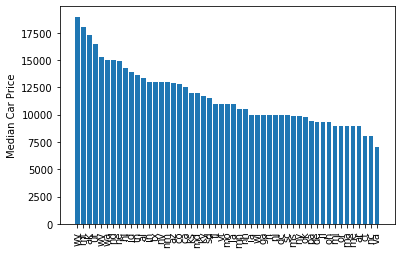

In [12]:
plt.bar(bar.index, bar)
plt.xticks(rotation=90)
plt.ylabel('Median Car Price')
plt.show()

In [ ]:
# Perhaps we can bin these regions into 
#Cheap regions: < 10,000
#Average regions: 10,000 - 15,000
#Expensive regions: > 15,000

In [13]:
print("Number of unique regions:", len(np.unique(cars.region)))

Number of unique regions: 405


In [14]:
cars[['lat','long']].describe()

,lat,long
count,450765.000000,450765.000000
mean,38.531925,-94.375824
std,5.857378,18.076225
min,-82.607549,-164.091797
25%,34.600000,-110.890427
50%,39.244500,-88.314889
75%,42.484503,-81.015022
max,82.049255,150.898969


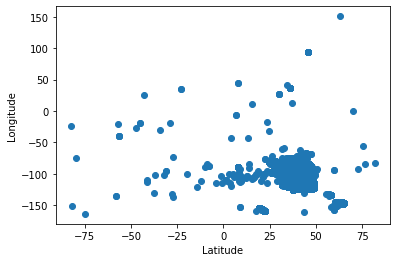

In [19]:
plt.scatter(cars.lat, cars.long)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

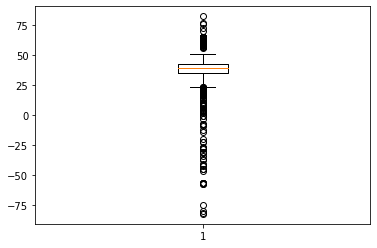

In [31]:
plt.boxplot(cars.lat.dropna())
plt.show()

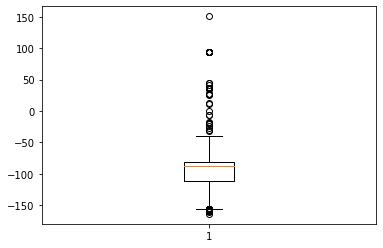

In [61]:
plt.boxplot(cars.long.dropna())
plt.show()

In [6]:
cars = cc.fillLatLongNA(cars)
cars = cc.fillLatLongOutliers(cars)

In [58]:
year_odo = cars[['year','odometer']].copy()

In [60]:
year_odo.dropna(inplace=True)

In [64]:
year_odo = year_odo.head(1000)

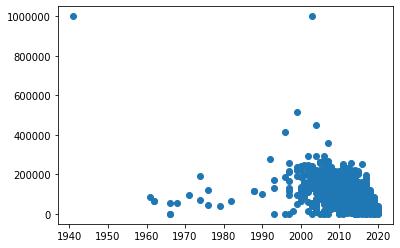

In [66]:
plt.scatter(year_odo.year, year_odo.odometer)
plt.show()

In [68]:
clean_df = pd.read_csv('clean_cars_df.csv')

In [69]:
clean_df.columns

Index(['Unnamed: 0', 'price', 'year', 'condition', 'odometer', 'lat', 'long',
       'color_black', 'color_other', 'color_silver',
       ...
       'manuf_country_USA', 'manuf_country_missing', 'tfidf_0', 'tfidf_2',
       'tfidf_4', 'tfidf_5', 'tfidf_6', 'tfidf_7', 'tfidf_8', 'tfidf_9'],
      dtype='object', length=104)

In [70]:
#Car Type
#type_df = cc.ohe_type(cars)
type_df = clean_df[['price','usage_type_daily','usage_type_professional','usage_type_other','usage_type_missing']].copy()

In [71]:
meanbytype = [np.mean(type_df[type_df.usage_type_daily == 1].price), 
 np.mean(type_df[type_df.usage_type_professional == 1].price), 
 np.mean(type_df[type_df.usage_type_other == 1].price),
 np.mean(type_df[type_df.usage_type_missing == 1].price)]

cols = ['usage_type_daily','usage_type_professional','usage_type_other','usage_type_missing']

In [72]:
meanbytype

[12256.61045574741, 19393.565454719188, 20111.48461338419, 12109.964591504171]

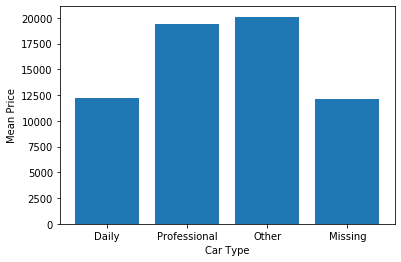

In [73]:
plt.bar(cols, meanbytype)
plt.xlabel('Car Type')
plt.ylabel('Mean Price')
plt.xticks(cols, ['Daily', 'Professional','Other','Missing'])
#plt.savefig('images/cartype.png',dpi=500)
plt.show()

In [ ]:
#Manufacturer

In [51]:
len(np.unique(cars['manufacturer'].astype(str)))

44

In [53]:
#man_df = cc.ohe_manuf_country(cars)

In [78]:
meanbyman = [np.mean(clean_df[clean_df.manuf_country_Germany == 1].price), 
             np.mean(clean_df[clean_df.manuf_country_Italy == 1].price), 
             np.mean(clean_df[clean_df.manuf_country_Japan == 1].price),
             np.mean(clean_df[clean_df['manuf_country_S.Korea'] == 1].price),
             np.mean(clean_df[clean_df.manuf_country_Sweden == 1].price),
             np.mean(clean_df[clean_df.manuf_country_UK == 1].price),
             np.mean(clean_df[clean_df.manuf_country_USA == 1].price),
             np.mean(clean_df[clean_df.manuf_country_missing == 1].price)]

cols = ['manuf_country_Germany',
       'manuf_country_Italy', 'manuf_country_Japan', 'manuf_country_S.Korea',
       'manuf_country_Sweden', 'manuf_country_UK', 'manuf_country_USA',
       'manuf_country_missing']

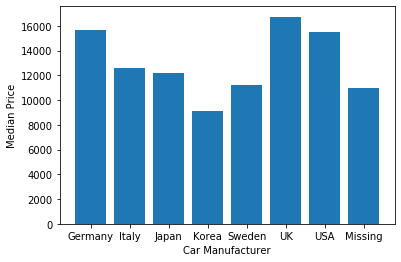

In [79]:
plt.bar(cols, meanbyman)
plt.xlabel('Car Manufacturer')
plt.ylabel('Median Price')
plt.xticks(cols, ['Germany', 'Italy','Japan','Korea','Sweden','UK','USA','Missing'])
#plt.savefig('images/carman.png',dpi=500)
plt.show()

In [85]:
np.sum(cars.isnull().sum(axis=1) > 0) / cars.shape[0]

0.9075058979121063

In [95]:
cars.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [89]:
test_df = cc.imputeManufacturer(cars)

In [92]:
test_df.isnull().sum()

Unnamed: 0            0
id                    0
url                   0
region                0
region_url            0
price                 0
year               1050
manufacturer      11915
model              4846
condition        192940
cylinders        171140
fuel               3237
odometer          55303
title_status       2577
transmission       2442
VIN              187549
drive            134188
size             321348
type             112738
paint_color      140843
image_url            28
description          70
state                 0
lat                7448
long               7448
posting_date         28
usage_type            0
manuf_country        21
dtype: int64

In [96]:
18220 - 11915

6305

In [99]:
import scipy.stats as sp

In [103]:
nona_df = cars.dropna()

In [110]:
from scipy.signal import savgol_filter
odom_hat = savgol_filter(nona_df.odometer, 51, 3)

In [113]:
len(odom_hat)

42384

In [104]:
sp.pearsonr(nona_df.year, nona_df.odometer)

(-0.006878083065152598, 0.15677792790676126)

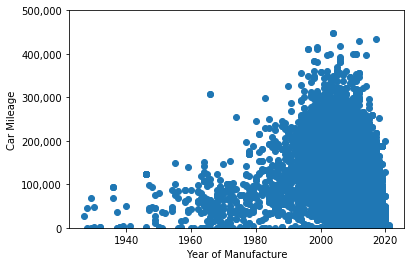

In [118]:
plt.scatter(nona_df.year, nona_df.odometer)
#plt.plot(nona_df.year, odom_hat)
plt.ylim((0, 500000))
plt.xlabel('Year of Manufacture')
plt.ylabel('Car Mileage')
plt.yticks([0, 100000, 200000,300000,400000,500000], ['0', '100,000','200,000','300,000','400,000','500,000'])
plt.savefig('images/odom.png',dpi=500)
plt.show()

In [120]:
test_df = cc.imputeOdometerByYear(cars)

In [122]:
test_df.isnull().sum()['odometer']

28

In [126]:
print(cars.shape[0] - cars.isnull().sum()['lat'])
print(cars.shape[0] - cars.isnull().sum()['long'])

450765
450765


In [127]:
latlong_outliers = (cars.lat<20)  | (cars.lat>70) | (cars.long < -160) | (cars.long > -60)

In [129]:
np.sum(latlong_outliers)

449

In [130]:
449/450765

0.0009960844342395705